# CS675 - Introduction to Data Science
# Project #1 - Exploratory Data Analysis on Telecom Customer Churn

##  Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
import pandas_profiling
from pandas_profiling import ProfileReport
import sweetviz as sv
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px
import plotly.graph_objects as go
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

C:\Users\mohan\AppData\Local\Temp\ipykernel_12576\2580304654.py:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


## Set display options for pandas

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)


## Read the dataset

In [3]:
df = pd.read_csv('telco-customer_churn.csv')

## Part 1: Data Preparation

## 1.1 Basic dataset information

In [5]:
print("\n1.1 Basic dataset information:")
print(f"Shape of the dataset: {df.shape}")
print("\nFirst 5 rows of the dataset:")
display(df.head())

print("\nDataset information:")
display(df.info())

print("\nStatistical summary:")
display(df.describe())


1.1 Basic dataset information:
Shape of the dataset: (7043, 21)

First 5 rows of the dataset:


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

None


Statistical summary:


SeniorCitizen  tenure  MonthlyCharges
count        7043.00 7043.00         7043.00
mean            0.16   32.37           64.76
std             0.37   24.56           30.09
min             0.00    0.00           18.25
25%             0.00    9.00           35.50
50%             0.00   29.00           70.35
75%             0.00   55.00           89.85
max             1.00   72.00          118.75

## 1.2 Check for missing, null, NaN records

In [6]:
print("\nCheck for missing, null, NaN records:")
missing_values = df.isnull().sum()
print("\nMissing values per column:")
display(missing_values)


Check for missing, null, NaN records:

Missing values per column:


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## checking if TotalCharges might have hidden missing values (spaces or special chars)

In [7]:
print("\nUnique values in TotalCharges column that might be problematic:")
unusual_values = df[~df['TotalCharges'].astype(str).str.replace('.', '').str.isdigit()]
display(unusual_values)


Unique values in TotalCharges column that might be problematic:


customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753           Yes                No              No  No internet service   
936           Yes                No             DSL                  Yes   
1082          Yes               Yes              No  No internet service   
1340           No  No phone service             DSL                  Yes   
3331          Yes                No              No  No internet service   
3826          Yes               Yes              No  No internet service   
4380          Yes                No              No  No internet service   
5218          Yes                No              No  No internet service   
6670          Yes               Yes             DSL                   No   
6754          Yes               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85             

## 1.3 Fix missing or problematic values

In [8]:
print("\n1.3 Fix missing or problematic values:")
# Convert TotalCharges to numeric, coercing errors to NaN to reveal any hidden issues
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"NaN values in TotalCharges after conversion: {df['TotalCharges'].isna().sum()}")

# Handle missing values in TotalCharges
if df['TotalCharges'].isna().sum() > 0:
    # For customers with tenure=0, TotalCharges should be 0
    df['TotalCharges'] = df['TotalCharges'].fillna(0)
    print("Fixed missing TotalCharges values")


1.3 Fix missing or problematic values:
NaN values in TotalCharges after conversion: 11
Fixed missing TotalCharges values


## 1.4 Find outliers


1.4 Finding outliers in numerical features:


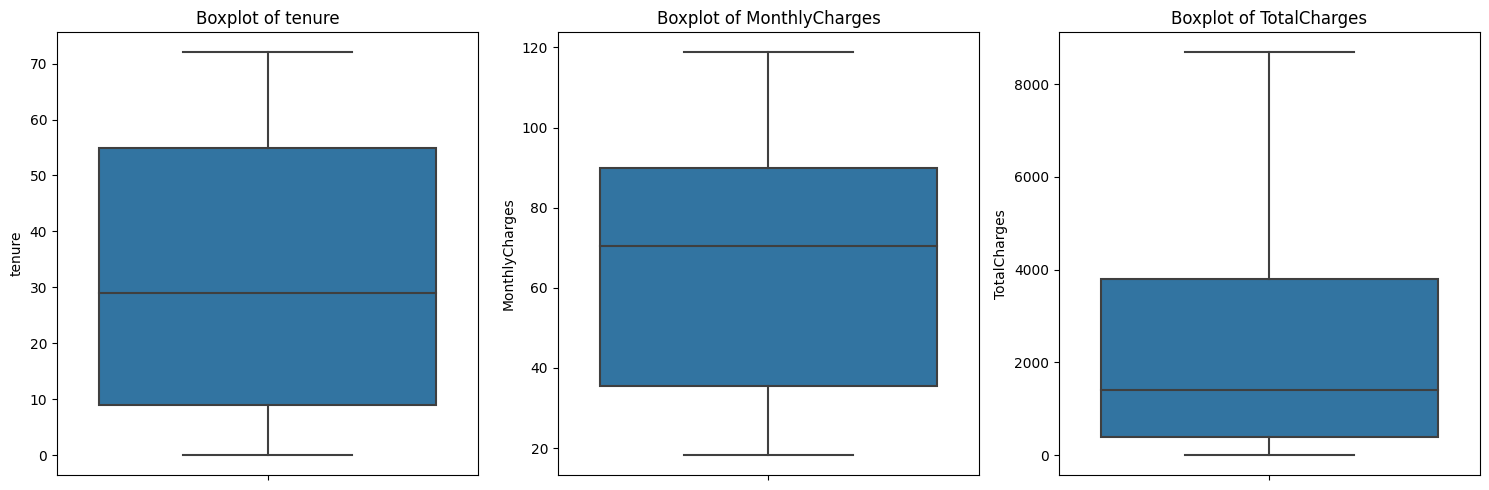

In [9]:
print("\n1.4 Finding outliers in numerical features:")
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## Calculate Z-scores to identify outliers

In [10]:
print("\nOutliers based on Z-score method (|z| > 3):")
for col in numerical_cols:
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    outliers = np.where(z_scores > 3)[0]
    print(f"{col}: {len(outliers)} outliers detected")
    if len(outliers) > 0 and len(outliers) < 10:  # Only show details if a few outliers
        display(df.iloc[outliers][[col, 'CustomerID']])


Outliers based on Z-score method (|z| > 3):
tenure: 0 outliers detected
MonthlyCharges: 0 outliers detected
TotalCharges: 0 outliers detected


## IQR method

In [11]:
print("\nOutliers based on IQR method (below Q1-1.5*IQR or above Q3+1.5*IQR):")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected")
    if len(outliers) > 0 and len(outliers) < 10:  # Only show details if a few outliers
        display(outliers[[col, 'CustomerID']])


Outliers based on IQR method (below Q1-1.5*IQR or above Q3+1.5*IQR):
tenure: 0 outliers detected
MonthlyCharges: 0 outliers detected
TotalCharges: 0 outliers detected


## 1.5 Transform categorical data to numeric

In [12]:
print("\n1.5 Transform categorical data to numeric:")

# Create a copy of the dataframe to avoid modifying the original
df_encoded = df.copy()

# First, let's identify all categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")


1.5 Transform categorical data to numeric:
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [13]:
# Drop CustomerID as it's not useful for modeling
if 'CustomerID' in categorical_cols:
    categorical_cols.remove('CustomerID')

In [14]:
# Initialize a label encoder for binary categories and target variable
le = LabelEncoder()

# For binary categorical features (Yes/No) and target, use Label Encoder
binary_cols = []
for col in categorical_cols:
    if df_encoded[col].nunique() == 2:
        binary_cols.append(col)
        df_encoded[col] = le.fit_transform(df_encoded[col])

print(f"\nBinary columns encoded using Label Encoder: {binary_cols}")


Binary columns encoded using Label Encoder: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [15]:
# For multi-value categorical features, use One-Hot Encoding
multi_cols = [col for col in categorical_cols if col not in binary_cols and col != 'Churn']
for col in multi_cols:
    # Create dummy variables
    dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
    # Add dummy variables to dataframe
    df_encoded = pd.concat([df_encoded, dummies], axis=1)
    # Drop original column
    df_encoded.drop(col, axis=1, inplace=True)

print(f"\nMulti-value columns encoded using One-Hot Encoding: {multi_cols}")


Multi-value columns encoded using One-Hot Encoding: ['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [16]:
# Encode the target variable 'Churn'
df_encoded['Churn'] = le.fit_transform(df_encoded['Churn'])
print("\nTarget variable 'Churn' encoded (0 = 'No', 1 = 'Yes')")

# Display the first 5 rows of the encoded dataframe
print("\nFirst 5 rows of the encoded dataframe:")
display(df_encoded.head())


Target variable 'Churn' encoded (0 = 'No', 1 = 'Yes')

First 5 rows of the encoded dataframe:


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  \
0                 1           29.85         29.85      0   
1                 0           56.95       1889.50      0   
2                 1           53.85        108.15      1   
3                 0           42.30       1840.75      0   
4                 1           70.70        151.65      1   

   customerID_0003-MKNFE  customerID_0004-TLHLJ  customerID_0011-IGKFF  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-EXCHZ  customerID_0013-MHZWF  customerID_0013-SMEOE  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0014-BMAQU  customerID_0015-UOCOJ  customerID_0016-QLJIS  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0017-DINOC  customerID_0017-IUDMW  customerID_0018-NYROU  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0019-EFAEP  customerID_0019-GFNTW  customerID_0020-INWCK  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0020-JDNXP  customerID_0021-IKXGC  customerID_0022-TCJCI  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0023-HGHWL  customerID_0023-UYUPN  customerID_0023-XUOPT  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0027-KWYKW  customerID_0030-FNXPP  customerID_0031-PVLZI  \
0                  False  

## Part 2: Data Types Analysis

## 2.1 List all types of data

In [17]:
print("\n2.1 Original data types:")
data_types = df.dtypes
display(data_types)


2.1 Original data types:


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [18]:
# Group columns by data type
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumeric columns: {numeric_cols}")
print(f"\nCategorical columns: {categorical_cols}")


Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


## Part 3: Exploratory Data Analysis

## 3.1 Univariate Analysis


Univariate Analysis:


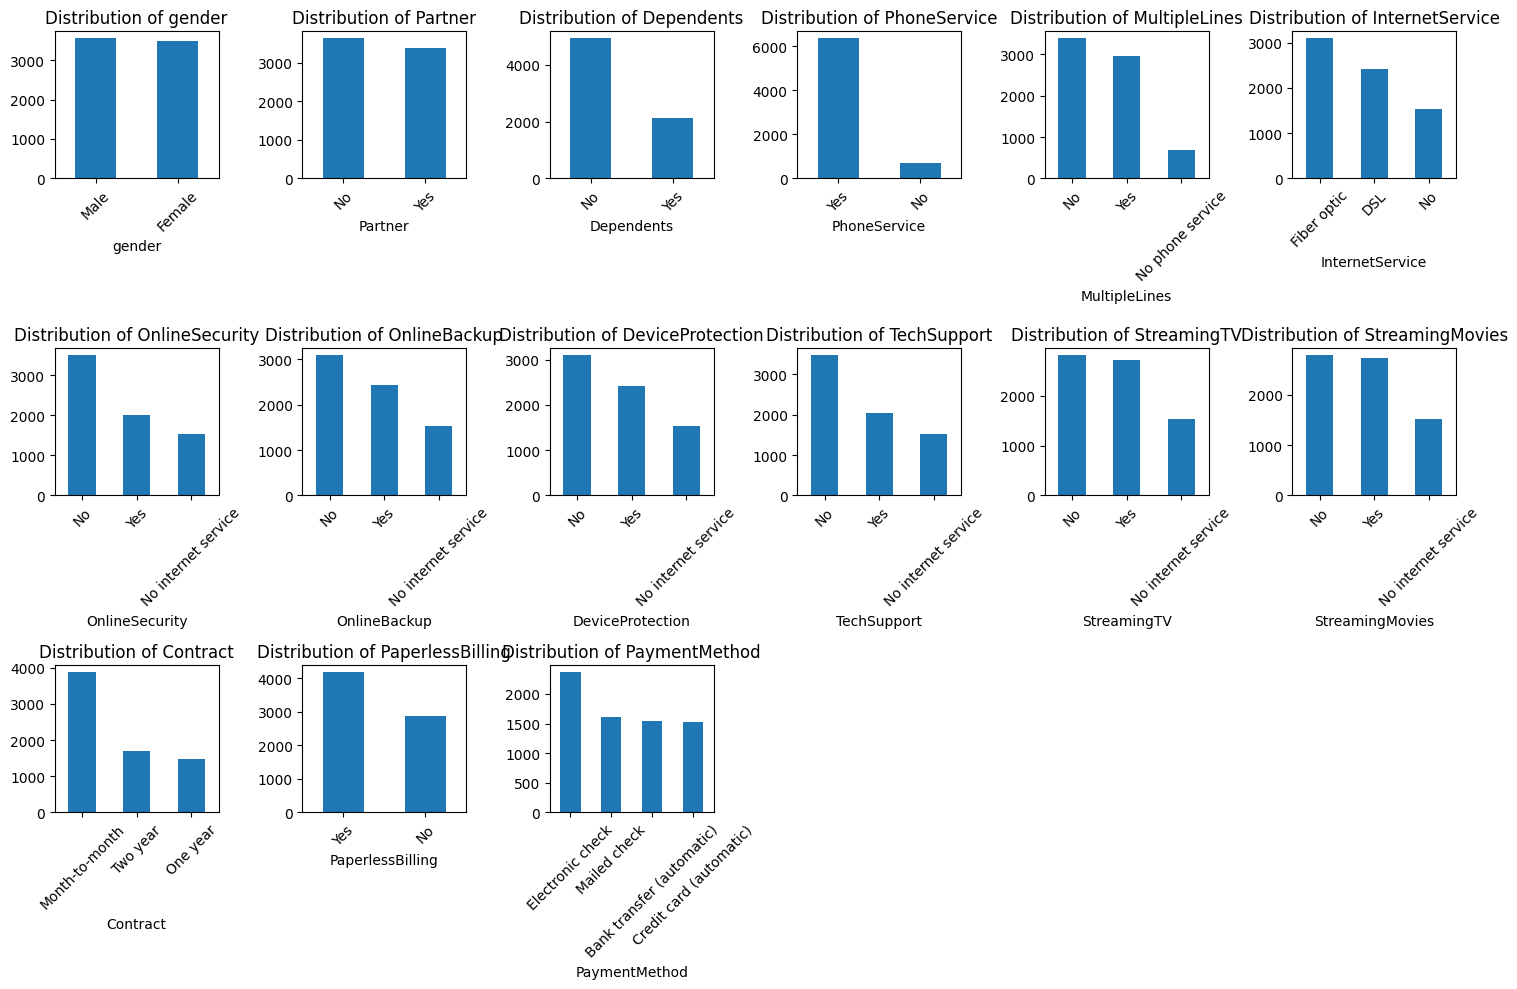

In [19]:
print("\nUnivariate Analysis:")

# Categorical variables distribution
plt.figure(figsize=(15, 10))
categorical_feat = [col for col in categorical_cols if col != 'customerID' and col != 'Churn']
for i, col in enumerate(categorical_feat):
    plt.subplot(3, 6, i+1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

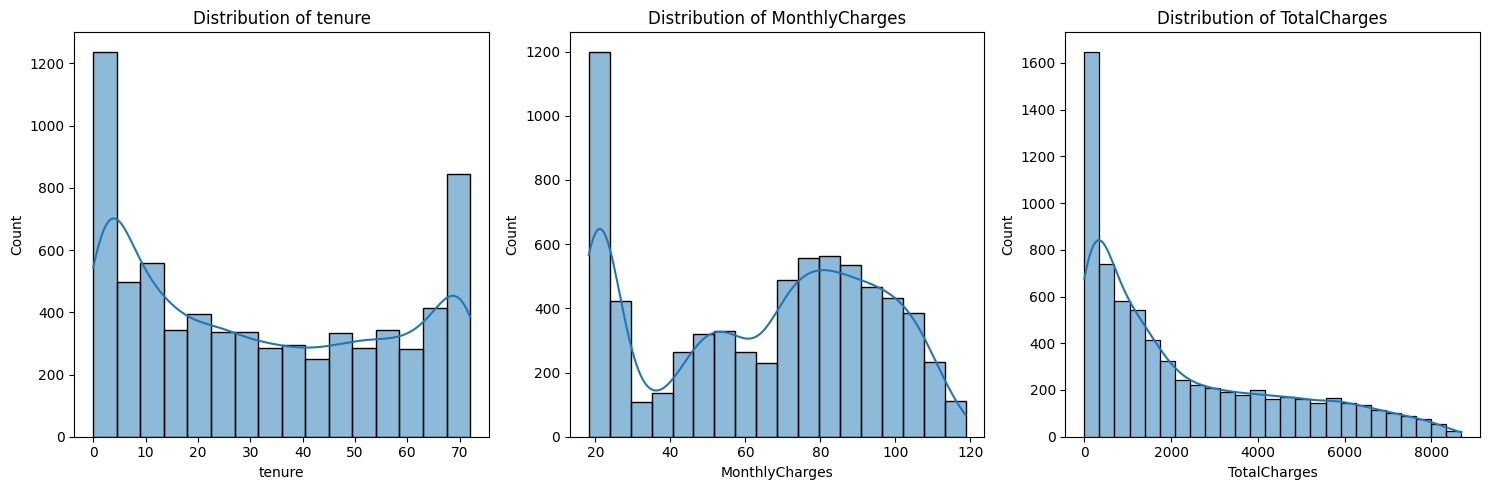

In [20]:
# Numerical variables distribution
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## 3.2 Bivariate Analysis


Bivariate Analysis - Relationship with Churn:


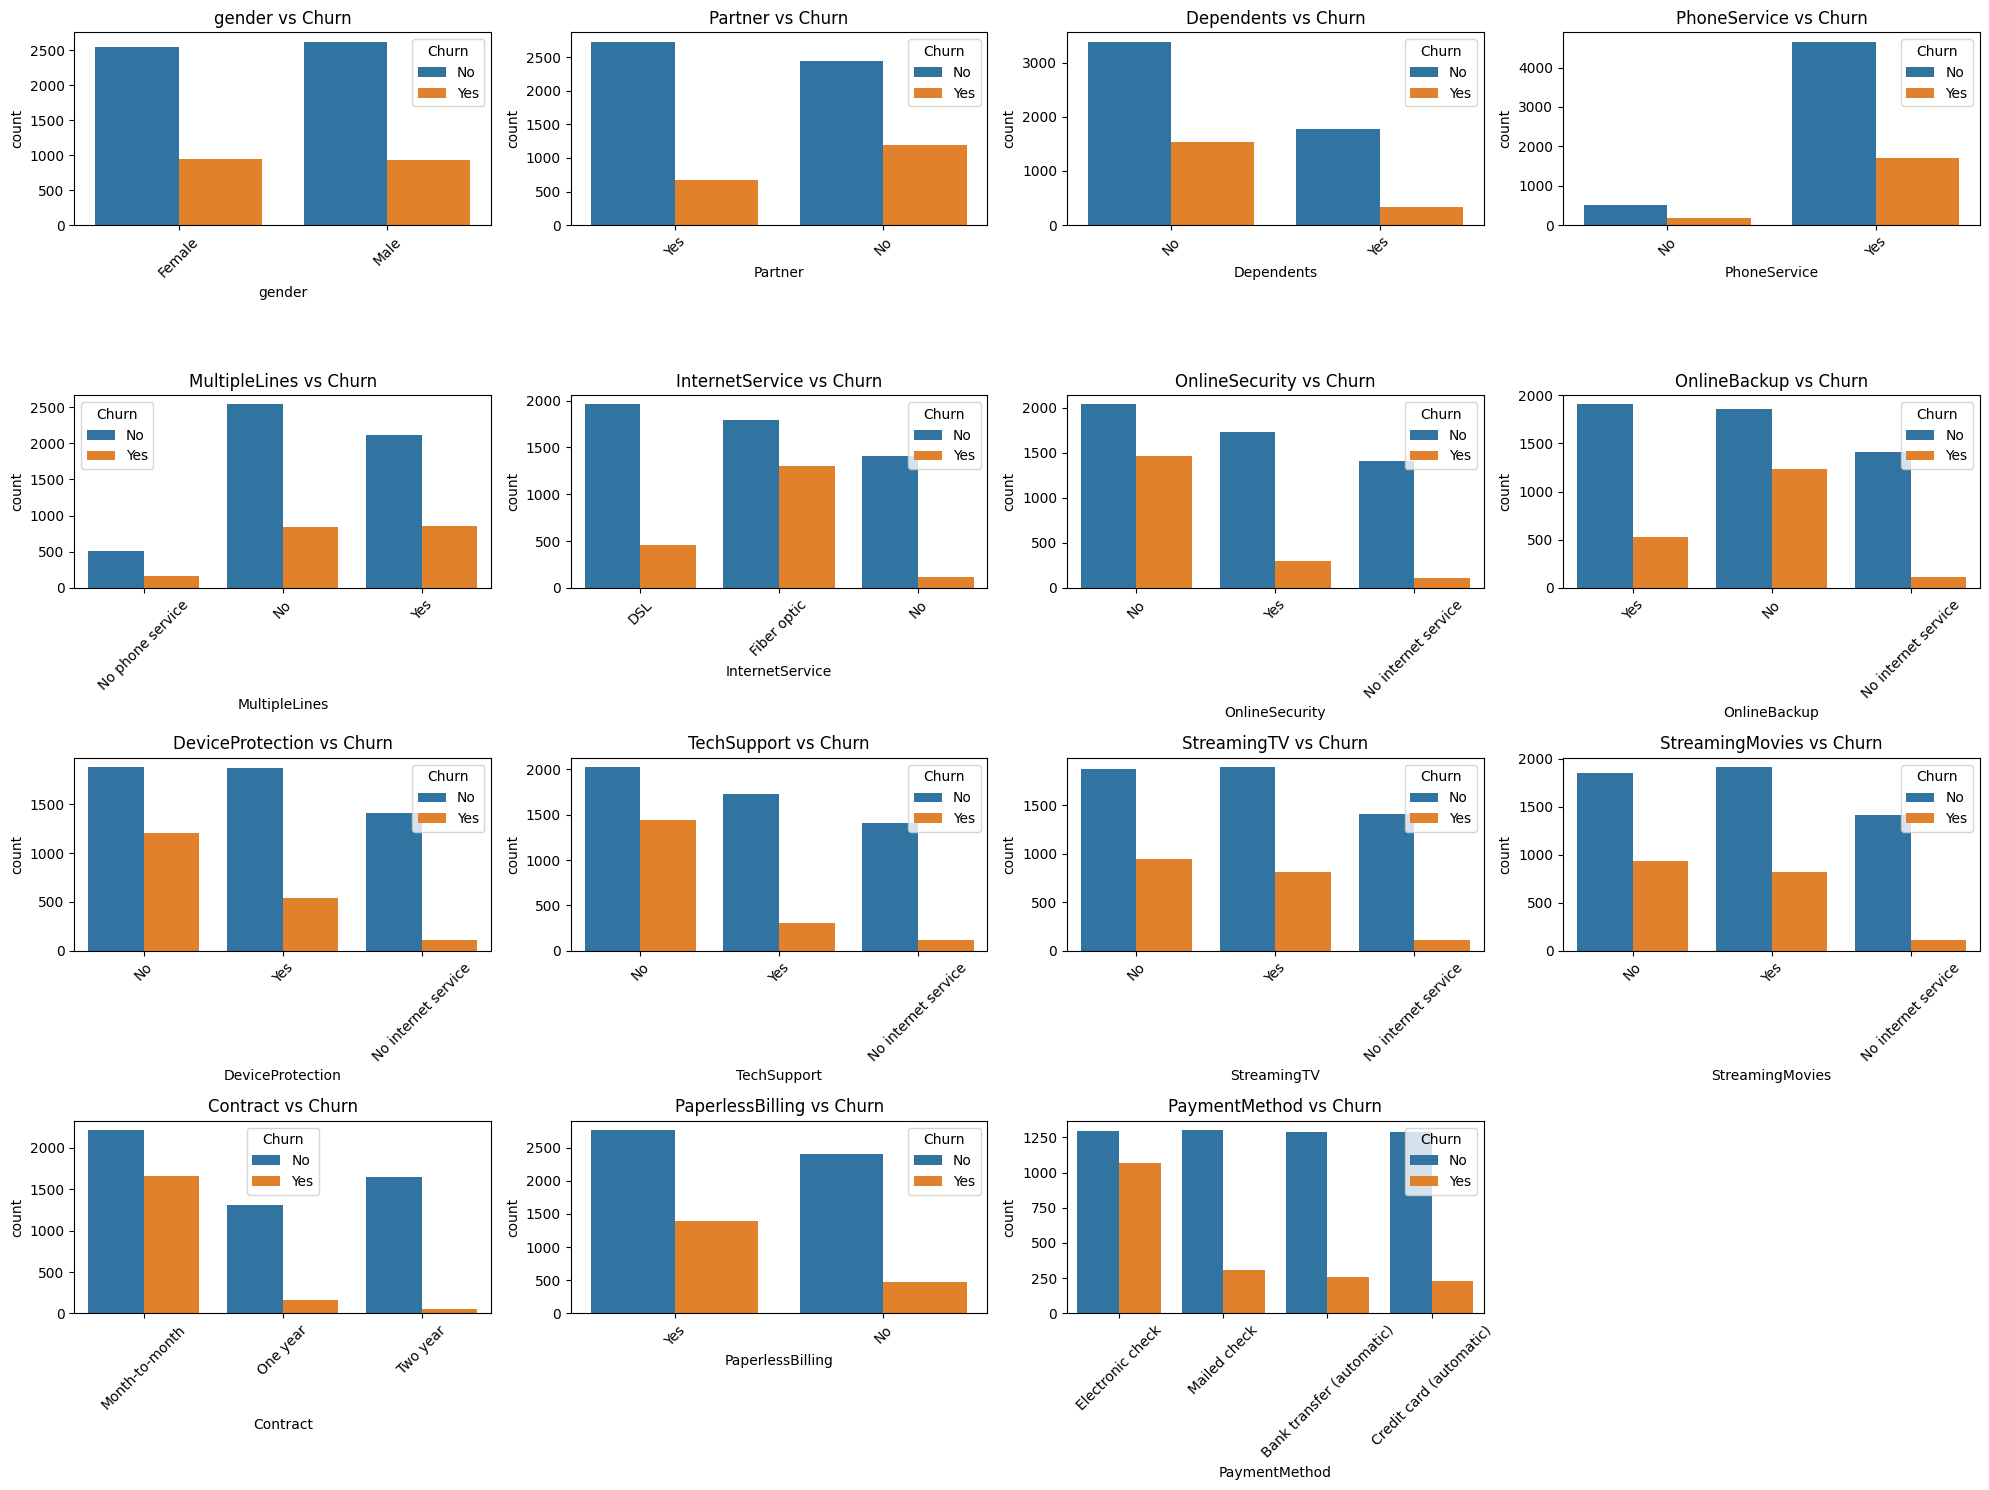

In [21]:
print("\nBivariate Analysis - Relationship with Churn:")

# Categorical vs Target
plt.figure(figsize=(20, 15))
categorical_feat = [col for col in categorical_cols if col != 'customerID' and col != 'Churn']
for i, col in enumerate(categorical_feat):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

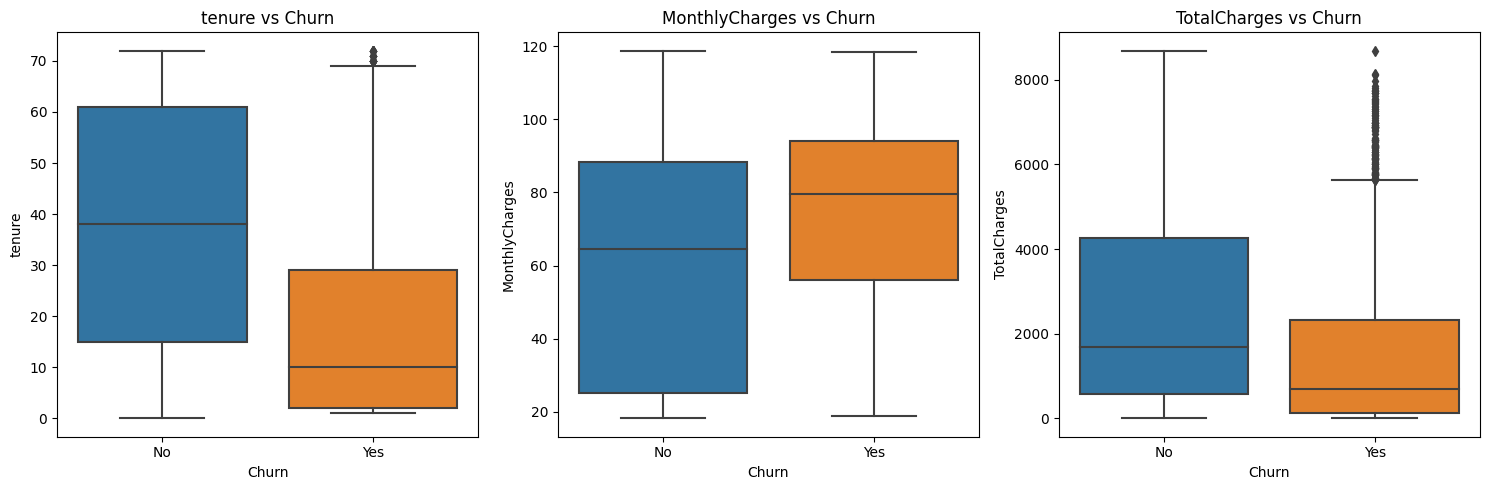

In [22]:
# Numerical vs Target
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=col, x='Churn', data=df)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

## 3.3 Correlation Analysis

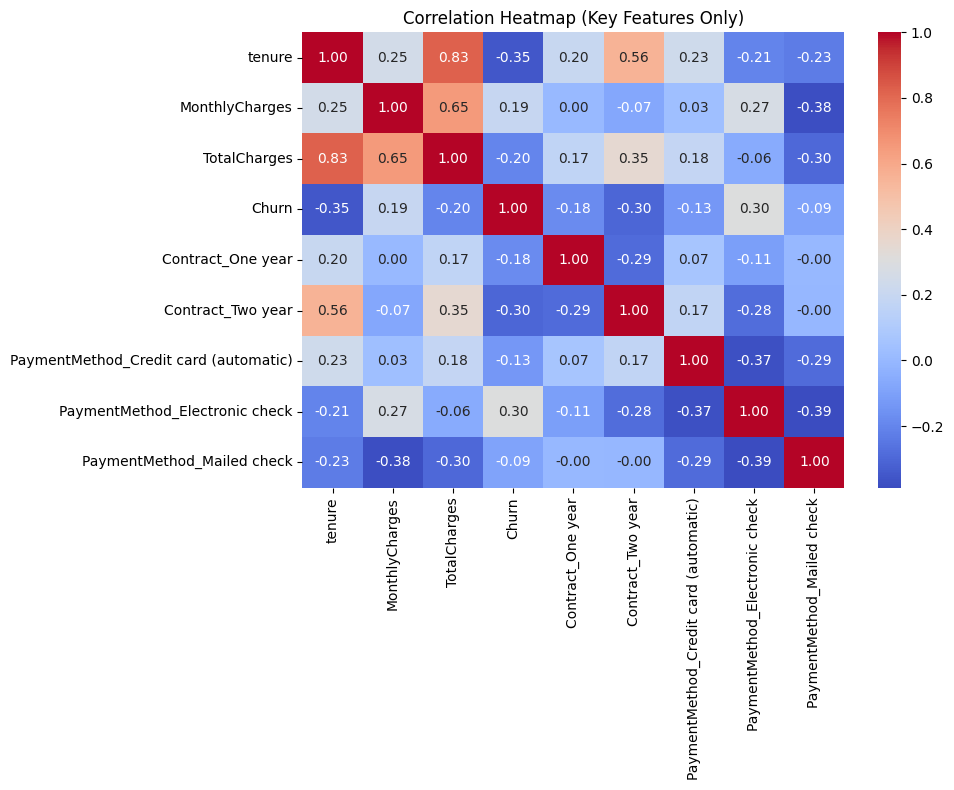

In [23]:
important_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] + \
                     [col for col in df_encoded.columns if 'Contract' in col or 'PaymentMethod' in col]
                     
correlation_subset = df_encoded[important_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Key Features Only)')
plt.tight_layout()
plt.show()

In [24]:
# Point-Biserial Correlation for numerical vs target
from scipy.stats import pointbiserialr
print("\nPoint-Biserial Correlation with Churn:")
for col in numerical_cols:
    corr, p_value = pointbiserialr(df_encoded[col], df_encoded['Churn'])
    print(f"{col}: Correlation = {corr:.4f}, p-value = {p_value:.4f}")


Point-Biserial Correlation with Churn:
tenure: Correlation = -0.3522, p-value = 0.0000
MonthlyCharges: Correlation = 0.1934, p-value = 0.0000
TotalCharges: Correlation = -0.1983, p-value = 0.0000


In [25]:
# Chi-square test for categorical vs target
from scipy.stats import chi2_contingency
print("\nChi-square test for categorical features vs Churn:")
for col in categorical_cols:
    if col not in ['CustomerID', 'Churn']:
        contingency_table = pd.crosstab(df[col], df['Churn'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"{col}: Chi2 = {chi2:.4f}, p-value = {p:.4f}")


Chi-square test for categorical features vs Churn:
customerID: Chi2 = 7043.0000, p-value = 0.4944
gender: Chi2 = 0.4841, p-value = 0.4866
Partner: Chi2 = 158.7334, p-value = 0.0000
Dependents: Chi2 = 189.1292, p-value = 0.0000
PhoneService: Chi2 = 0.9150, p-value = 0.3388
MultipleLines: Chi2 = 11.3304, p-value = 0.0035
InternetService: Chi2 = 732.3096, p-value = 0.0000
OnlineSecurity: Chi2 = 849.9990, p-value = 0.0000
OnlineBackup: Chi2 = 601.8128, p-value = 0.0000
DeviceProtection: Chi2 = 558.4194, p-value = 0.0000
TechSupport: Chi2 = 828.1971, p-value = 0.0000
StreamingTV: Chi2 = 374.2039, p-value = 0.0000
StreamingMovies: Chi2 = 375.6615, p-value = 0.0000
Contract: Chi2 = 1184.5966, p-value = 0.0000
PaperlessBilling: Chi2 = 258.2776, p-value = 0.0000
PaymentMethod: Chi2 = 648.1423, p-value = 0.0000


## 3.4 Feature Importance

In [26]:
print("\nFeature Importance:")

# Prepare data for feature importance
X = df_encoded.drop(['Churn', 'CustomerID'], axis=1, errors='ignore')
y = df_encoded['Churn']


Feature Importance:


In [27]:
# Feature importance using SelectKBest and f_classif
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})
scores = scores.sort_values(by='Score', ascending=False)

print("\nFeature importance using ANOVA F-value:")
display(scores.head(10))  # Top 10 features


Feature importance using ANOVA F-value:


Feature  Score
4                                   tenure 997.27
7053           InternetService_Fiber optic 738.05
7068                     Contract_Two year 707.92
7070        PaymentMethod_Electronic check 706.20
7059  DeviceProtection_No internet service 385.70
7063       StreamingTV_No internet service 385.70
7057      OnlineBackup_No internet service 385.70
7061       TechSupport_No internet service 385.70
7054                    InternetService_No 385.70
7055    OnlineSecurity_No internet service 385.70

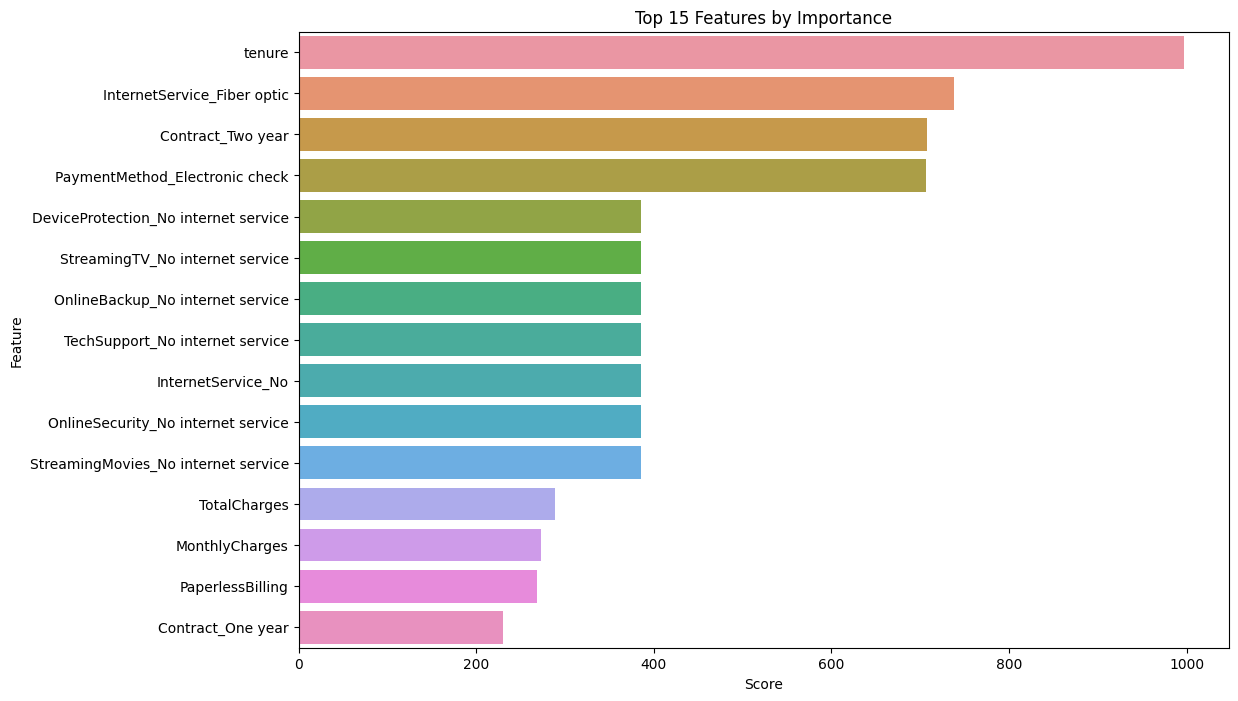

In [28]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=scores.head(15))
plt.title('Top 15 Features by Importance')
plt.show()

## 3.5 Logistic Regression for feature importance

In [29]:

print("\nLogistic Regression Analysis for feature importance:")

# Make sure all data is proper numeric type
X_clean = X.select_dtypes(include=['number'])  # Keep only numeric columns

# Check for any remaining issues
print(f"Shape of X before cleaning: {X.shape}")
print(f"Shape of X after keeping only numeric columns: {X_clean.shape}")

# Add constant
X_with_const = sm.add_constant(X_clean)

# Convert to numpy arrays for statsmodels
X_array = np.asarray(X_with_const)
y_array = np.asarray(y)

# Now fit the logistic regression model
try:
    logit_model = sm.Logit(y_array, X_array)
    result = logit_model.fit(disp=0)  # disp=0 to suppress convergence messages
    print(result.summary())

    
except Exception as e:
    print(f"Error in logistic regression: {e}")
    print("\nAlternative: Let's use scikit-learn's LogisticRegression instead")
    
    # Alternative using scikit-learn
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_clean)
    
    # Train logistic regression model
    lr = LogisticRegression(random_state=42, max_iter=1000)
    lr.fit(X_scaled, y)
    
    # Get coefficients
    coef_df = pd.DataFrame({
        'Feature': X_clean.columns,
        'Coefficient': lr.coef_[0]
    })
    coef_df = coef_df.sort_values('Coefficient', ascending=False)
    
    print("\nLogistic Regression Coefficients (scikit-learn):")
    display(coef_df)
    
  


Logistic Regression Analysis for feature importance:
Shape of X before cleaning: (7043, 7072)
Shape of X after keeping only numeric columns: (7043, 9)
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7033
Method:                           MLE   Df Model:                            9
Date:                Thu, 27 Feb 2025   Pseudo R-squ.:                  0.2411
Time:                        17:29:24   Log-Likelihood:                -3092.4
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0762      0.150     -7.185      0.000    

In [30]:
# Extract coefficients
coefficients = pd.DataFrame({
    'Feature': X_with_const.columns[1:],  # Skip 'const'
    'Coefficient': result.params[1:],
    'p-value': result.pvalues[1:]
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

print("\nLogistic Regression Coefficients (sorted by magnitude):")
display(coefficients)


Logistic Regression Coefficients (sorted by magnitude):


Feature  Coefficient  p-value
6  PaperlessBilling         0.54     0.00
1     SeniorCitizen         0.49     0.00
7    MonthlyCharges         0.03     0.00
2           Partner         0.02     0.81
0            gender         0.01     0.93
8      TotalCharges         0.00     0.01
4            tenure        -0.07     0.00
3        Dependents        -0.33     0.00
5      PhoneService        -0.87     0.00

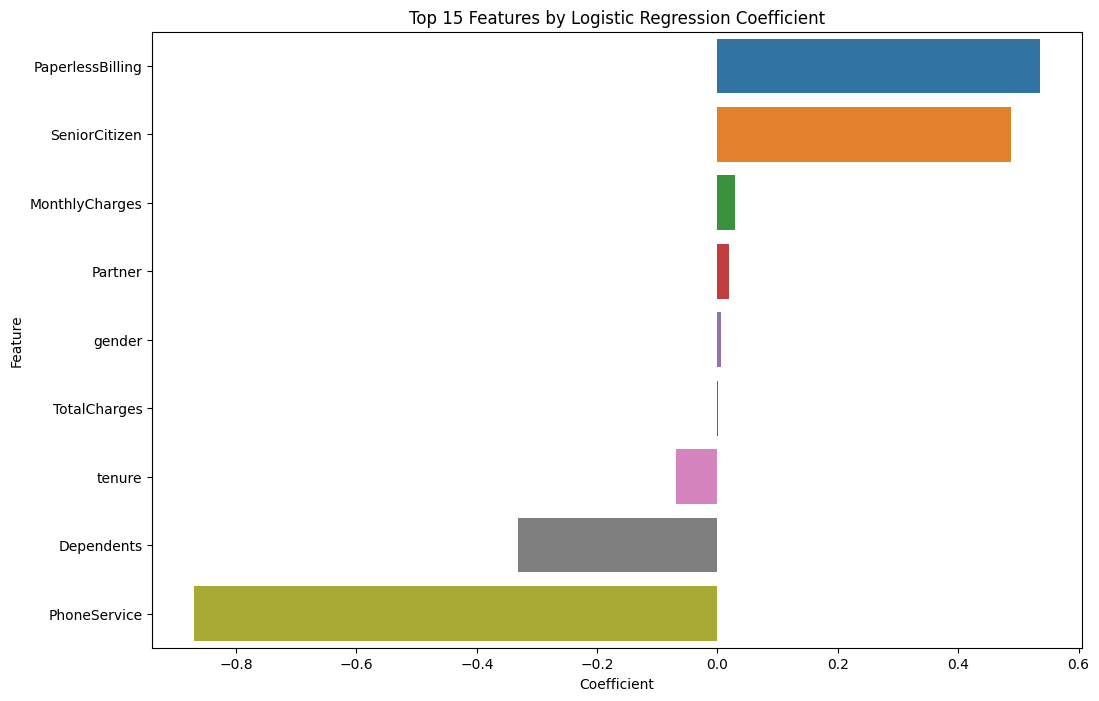

In [31]:
# Visualize coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients.head(15))
plt.title('Top 15 Features by Logistic Regression Coefficient')
plt.show()

## 3.6 Additional visualizations for insights


Additional visualizations for business insights:


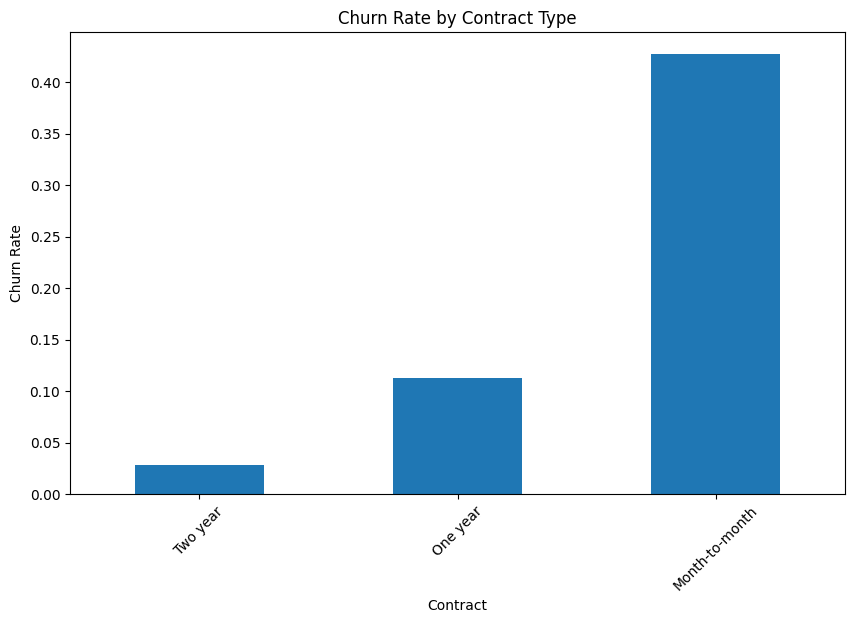

In [32]:
print("\nAdditional visualizations for business insights:")

# Churn rate by contract type
plt.figure(figsize=(10, 6))
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
contract_churn['Yes'].sort_values().plot(kind='bar')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

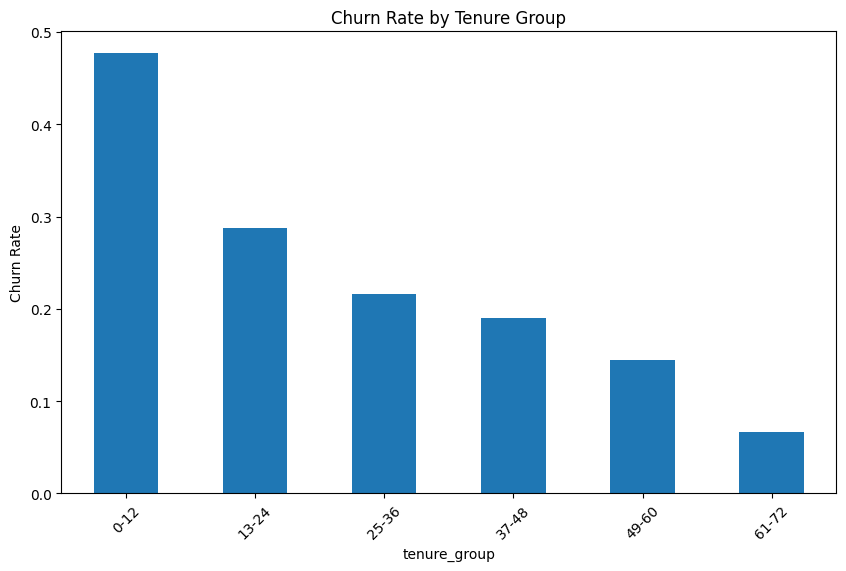

In [33]:
# Churn rate by tenure groups
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72],
                           labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
plt.figure(figsize=(10, 6))
tenure_churn = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()
tenure_churn['Yes'].plot(kind='bar')
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

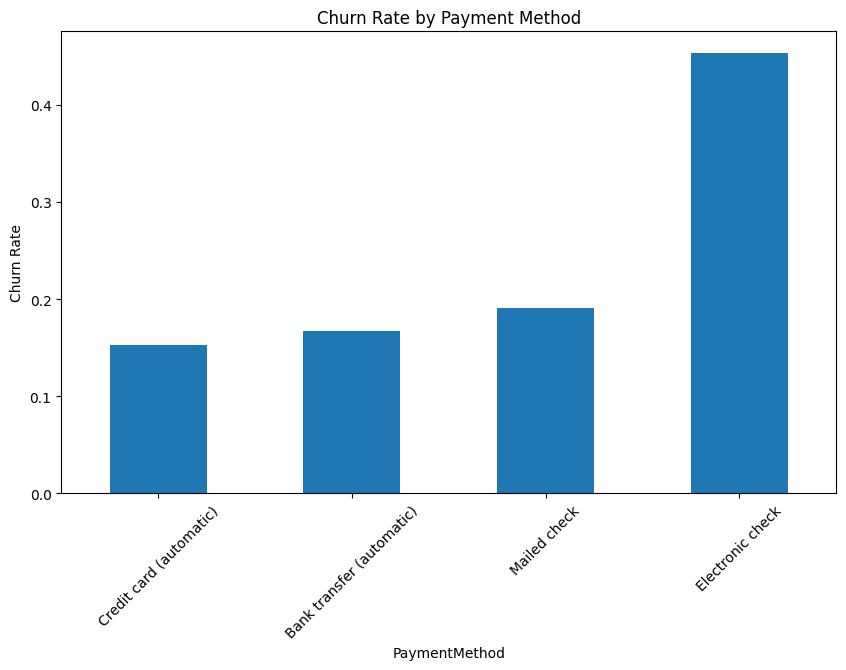

In [34]:
# Churn rate by payment method
plt.figure(figsize=(10, 6))
payment_churn = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
payment_churn['Yes'].sort_values().plot(kind='bar')
plt.title('Churn Rate by Payment Method')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

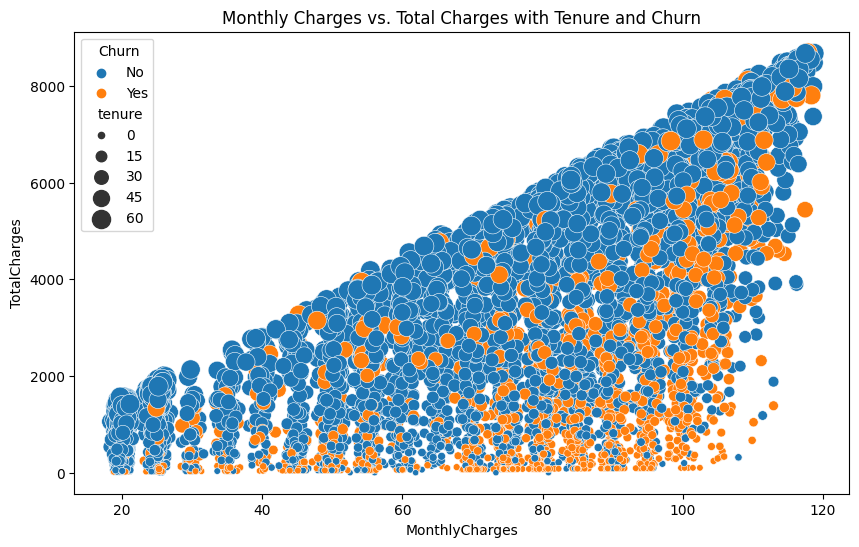

In [35]:
# Monthly charges vs. Churn with Tenure as size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', size='tenure',
                sizes=(20, 200), data=df)
plt.title('Monthly Charges vs. Total Charges with Tenure and Churn')
plt.show()

## Part 4: Pandas Profiling and SweetViz Analysis

## 4.1 Pandas Profiling

In [42]:
print("\n4.1 Generating Pandas Profiling report...")
profile = ProfileReport(df, title="Telco Customer Churn - Pandas Profiling Report", explorative=True)
profile.to_file("telco_customer_churn_profile.html")
print("Pandas Profiling report saved as 'telco_customer_churn_profile.html'")


4.1 Generating Pandas Profiling report...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Profiling report saved as 'telco_customer_churn_profile.html'


## 4.2 SweetViz Analysis

In [37]:
import sweetviz as sv  # Import SweetViz

print("\n4.2 Generating SweetViz report...")
sv_report = sv.analyze(df, target_feat='Churn')
sv_report.show_html("telco_customer_churn_sweetviz.html")
print("SweetViz report saved as 'telco_customer_churn_sweetviz.html'")



4.2 Generating SweetViz report...


                                             |                                             | [  0%]   00:00 ->…

Report telco_customer_churn_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
SweetViz report saved as 'telco_customer_churn_sweetviz.html'


np.

## Part 5: Train-Test Split and Comparison

In [38]:
# 5.1 Split the dataset (80/20 ratio)
X = df.drop(['Churn', 'CustomerID'], axis=1, errors='ignore')
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Add target back for SweetViz comparison
train_df = X_train.copy()
train_df['Churn'] = y_train
test_df = X_test.copy()
test_df['Churn'] = y_test

print(f"\nTrain set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")


Train set shape: (5634, 22)
Test set shape: (1409, 22)


In [39]:
# Sanity check: churn distribution in train and test sets
print("\nChurn distribution in train and test sets:")
print("Train set:")
display(train_df['Churn'].value_counts(normalize=True))
print("Test set:")
display(test_df['Churn'].value_counts(normalize=True))


Churn distribution in train and test sets:
Train set:


Churn
No    0.73
Yes   0.27
Name: proportion, dtype: float64

Test set:


Churn
No    0.73
Yes   0.27
Name: proportion, dtype: float64

## 5.2 SweetViz comparison between train and test

In [40]:
print("\n5.2 Generating SweetViz comparison report between train and test sets...")
compare_report = sv.compare([train_df, "Train"], [test_df, "Test"], "Churn")
compare_report.show_html("train_test_comparison_sweetviz.html")
print("SweetViz comparison report saved as 'train_test_comparison_sweetviz.html'")



5.2 Generating SweetViz comparison report between train and test sets...


                                             |                                             | [  0%]   00:00 ->…

Report train_test_comparison_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
SweetViz comparison report saved as 'train_test_comparison_sweetviz.html'


## Part 6: Conclusion and Data Issues/Limitations

#### Based on the exploratory data analysis, here are the key findings and limitations:

### Key Findings:
 1. Contract type is strongly associated with churn - month-to-month contracts have much higher churn rates.
 2. Payment method is significant - customers using electronic checks have higher churn rates.
 3. Newer customers (lower tenure) are more likely to churn.
 4. Higher monthly charges correlate with higher churn rates, particularly for newer customers.
 5. Internet service type matters - fiber optic customers seem to churn more.
 6. Customers without additional services (online security, tech support, etc.) tend to churn more.

### Dataset Limitations/Issues:
 1. Imbalanced target variable - churn is less frequent than retention, which could affect model training.
 2. Some features have high correlation (e.g., MonthlyCharges and TotalCharges), which may cause multicollinearity issues.
 3. Customer demographics are limited - more demographic information could provide better insights.
 4. Missing contextual data - no information about competitors, market conditions, or specific reasons for churn.
 5. No temporal data beyond tenure - seasonal patterns or time-based trends cannot be analyzed.
 6. Limited geographic information - no data about customer location, which could affect service quality and churn.
 7. No information about customer interactions or satisfaction metrics before churning.
 8. TotalCharges column had some conversion issues - a more robust data collection process might be needed.